In [1]:
# Loading the required libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing Trains dataset
df_train=pd.read_csv('train.csv')
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
# Checking the data types
df_train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [4]:
# Getting an idea about the sum of null values across all the columns 
df_train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [5]:
# Getting the total number of rows and columns 
df_train.shape

(1458644, 11)

In [6]:
# Getting summary statistics of train dataset
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


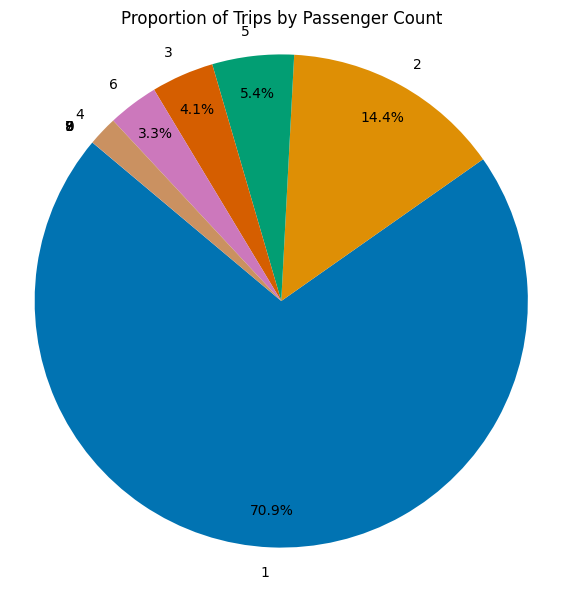

In [7]:
# Used pie chart to get proportion of trips by passenger count
# Function to format the labels
def autopct_format(pct):
    return ('%1.1f%%' % pct) if pct > 2 else ''

# Calculate passenger count
passenger_counts = df_train['passenger_count'].value_counts()

# Set color of pie to colorblind
color = sns.color_palette('colorblind')

plt.figure(figsize=(7, 7))
plt.pie(passenger_counts, labels=passenger_counts.index, autopct=autopct_format, startangle=140,colors=color,
        pctdistance=0.85,  # Adjust the percentage labels position
        labeldistance=1.1)  # Adjust the labels position
plt.title('Proportion of Trips by Passenger Count')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [8]:
# Reason for using Pie Chart : The pie chart is chosen for its ability to visually represent the distribution of trips by
# passenger count in a simple and intuitive manner, making it easy for viewers to quickly understand the relative proportions 
# of different passenger counts in the dataset.

# Insights:The largest segment in the pie chart represents trips with a single passenger. This indicates that most trips
# in the dataset are taken by individuals rather than groups.

In [9]:
# Used line plot to calculate average trip duration by day of the Week

# Convert 'pickup_datetime' to datetime
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])

In [10]:
df_train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [11]:
# Create 'pickup_dayofweek' column
df_train['pickup_dayofweek'] = df_train['pickup_datetime'].dt.dayofweek

In [12]:
# Checked wheather the column is created or not
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_dayofweek
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1


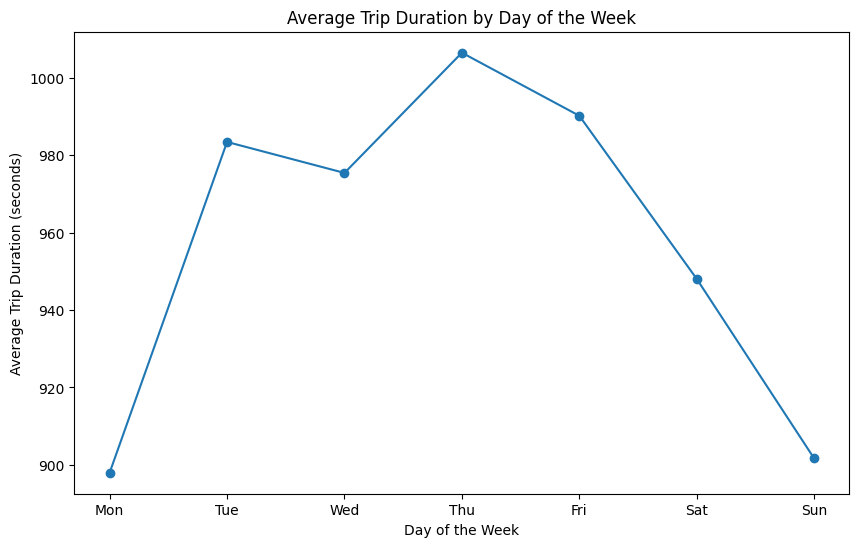

In [13]:
# Calculate average trip duration by day of the week
avg_duration_by_day = df_train.groupby('pickup_dayofweek')['trip_duration'].mean()

# Created line chart to plot the data
plt.figure(figsize=(10, 6))
avg_duration_by_day.plot(kind='line', marker='o')
plt.title('Average Trip Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (seconds)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [14]:
# Reason for using Line Chart : The line chart effectively presents the average trip duration by day of the week, allowing 
# viewers to discern trends, patterns, and comparisons within the dataset. Its sequential layout and connected data points 
# facilitate clear insights into how trip duration varies over different days, aiding in understanding travel patterns and 
# behaviors.

# Insights:Typically, we might expect shorter average trip durations on weekends compared to weekdays, as there may be fewer
# commuters and more leisure travelers.

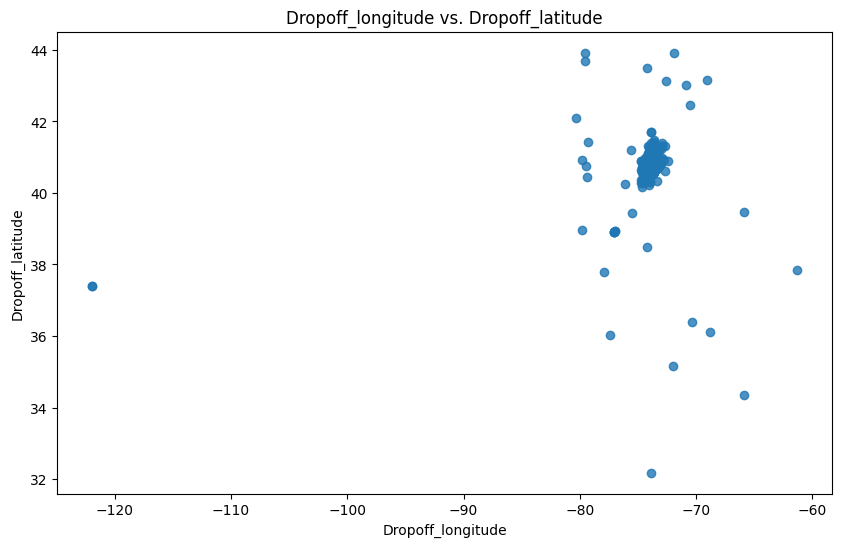

In [18]:
# Used scatter plot to get dropoff_longitude vs. dropoff_latitude
plt.figure(figsize=(10, 6))
plt.scatter(df_train['dropoff_longitude'], df_train['dropoff_latitude'], alpha=0.8)
plt.title('Dropoff_longitude vs. Dropoff_latitude')
plt.xlabel('Dropoff_longitude')
plt.ylabel('Dropoff_latitude')
plt.show()

In [16]:
# Reason for using Scatter plot : The scatter plot effectively visualizes the geographic relationship between dropoff longitude
# and dropoff latitude, allowing viewers to explore the geographic distribution of dropoff points and gain insights into 
# travel patterns, transportation routes, and geographic features within the dataset.

#Insights : Viewers can discern the geographical distribution of dropoff points based on their longitude and latitude 
# coordinates. Clusters or patterns in the scatter plot may indicate popular destinations or areas of high activity